# Proyek UTS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) 

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien. 

Informasi atribut: 

1) id: unique identifier 

2) gender: "Male", "Female" or "Other" 

3) age: age of the patient 

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

6) ever_married: "No" or "Yes" 

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 

8) Residence_type: "Rural" or "Urban" 

9) avg_glucose_level: average glucose level in blood 

10) bmi: body mass index 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 

12) stroke: 1 if the patient had a stroke or 0 if not 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient 

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [60]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns0

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [61]:
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [62]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
miss_val = df_stroke.isnull().sum().sort_values(ascending=False)
miss_val[miss_val > 0]

bmi    201
dtype: int64

In [63]:
df_stroke['bmi'].value_counts(dropna = False)

NaN     201
28.7     41
28.4     38
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: bmi, Length: 419, dtype: int64

<Axes: xlabel='bmi'>

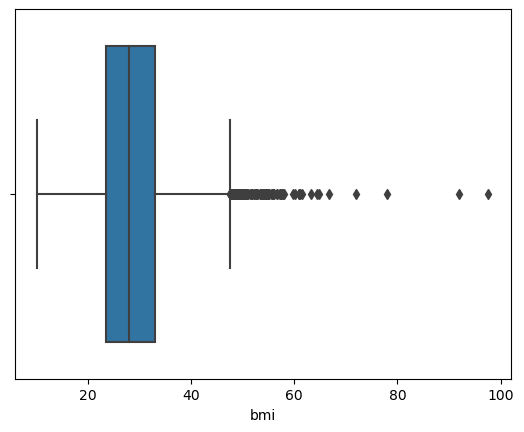

In [64]:
sns.boxplot(data = df_stroke, x = 'bmi')

In [65]:
med_bmi = df_stroke['bmi'].median()
print(med_bmi)

28.1


In [66]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(med_bmi)
df_stroke['bmi'].value_counts(dropna = False)

28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9      1
Name: bmi, Length: 418, dtype: int64

In [67]:
cols = ['id', 'gender', 'age' ,'hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi'	,'smoking_status','stroke']
df_stroke = df_stroke[cols]
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
df_stroke.info()
df_stroke.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [69]:
df_stroke.head()

print(df_stroke.shape)
cols_check = ['id', 'gender', 'age' ,'hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','bmi'	,'smoking_status','stroke']
df_stroke = df_stroke[~df_stroke[cols_check].duplicated(keep='last')]

df_stroke.shape

(5110, 12)


(5110, 12)

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
Plot 1 : Komposisi jumlah pasien laki laki dan perempuan pada data stroke
-> pada data stroke terdapat 2115 pasien laki laki dan 2994 pasien perempuan dimana jumlah pasien perempuan lebih banyak dari pasien laki laki
Plot 2 : Komposisi jumlah pasien laki laki dan perempuan yang menderita stroke
-> pada data stroke komposisi laki laki lebih rentan terkena stroke dibandingkan perempuan


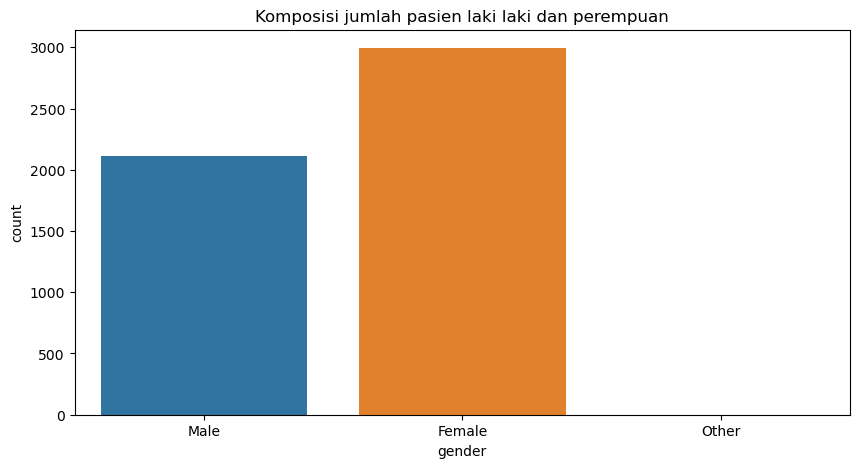

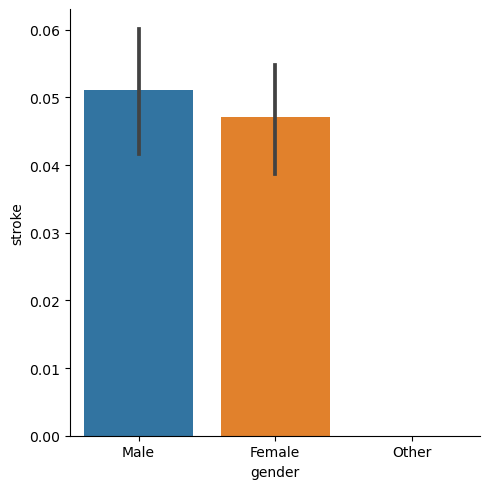

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'gender' , data = df_stroke)

plt.title("Komposisi jumlah pasien laki laki dan perempuan")
sns.catplot(data = df_stroke, x = 'gender', y = 'stroke', kind = 'bar')

 2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
-> pada persebaran data usia terdapat 2 kelompok yaitu kelompok yang menderita hipertensi dan kelompok yang sehat dimana kelompok yang menderita hipertensi lebih banyak terdapat pada usia 60-80 tahun sedangkan kelompok yang sehat lebih banyak terdapat pada usia 40-60 tahun


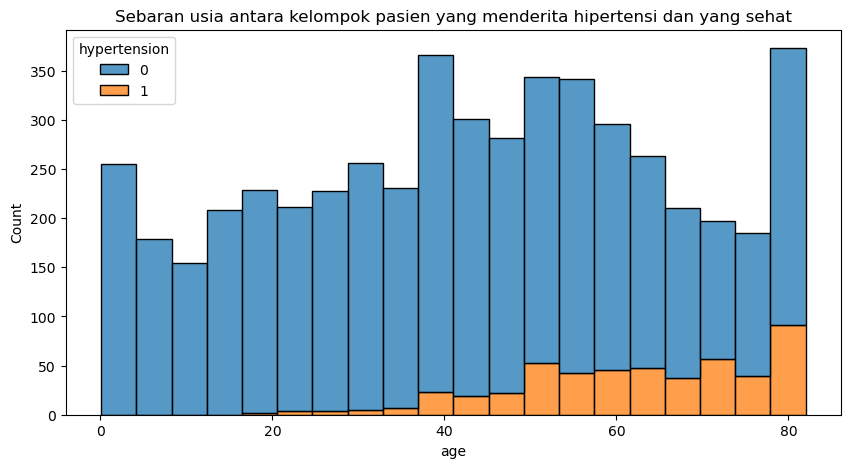

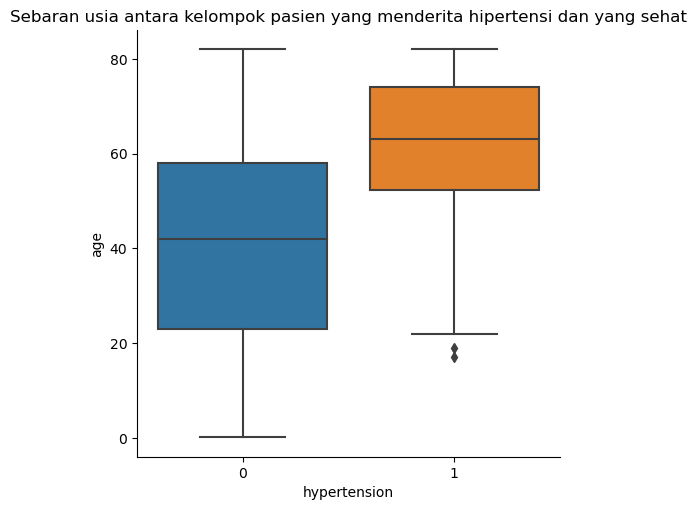

In [71]:
plt.figure(figsize=(10,5))
sns.histplot(data = df_stroke, x = 'age', hue = 'hypertension', multiple = 'stack')
plt.title("Sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat")
plt.show()

sns.catplot(data = df_stroke, x = 'hypertension', y = 'age', kind = 'box')
plt.title("Sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat")
plt.show()


   3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?
  -> pada data stroke terdapat 2 kelompok yaitu kelompok yang menderita stroke dan kelompok yang sehat dimana kelompok yang menderita stroke lebih banyak terdapat rerata glukosa dalam darah sedangkan kelompok yang sehat lebih banyak terdapat pada rerata glukosa yang rendah

<Figure size 1000x500 with 0 Axes>

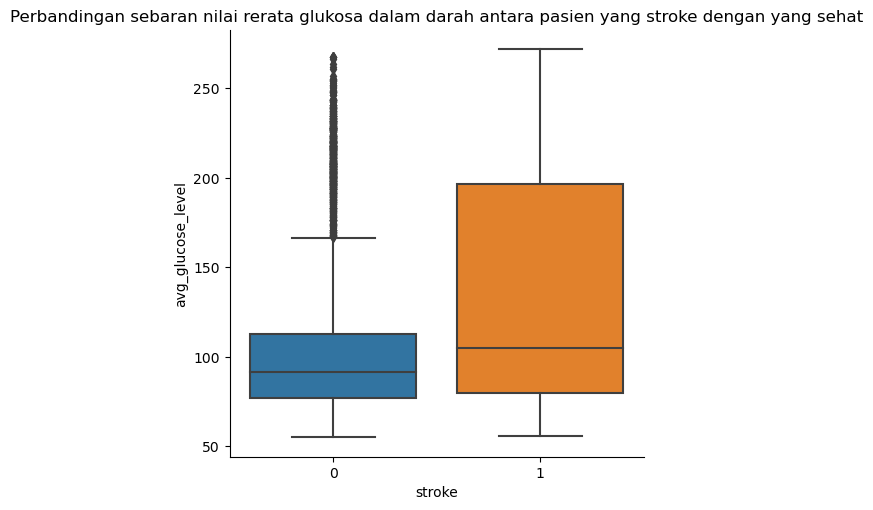

In [72]:
plt.figure(figsize=(10,5))
sns.catplot(data = df_stroke, x = 'stroke', y = 'avg_glucose_level', kind = 'box')
plt.title("Perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat")
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

    1.Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    Plot 1 : Komposisi jumlah pasien laki laki dan perempuan pada data stroke
    -> pada data stroke terdapat 2115 pasien laki laki dan 2994 pasien perempuan dimana jumlah pasien perempuan lebih banyak dari pasien laki laki
    Plot 2 : Komposisi jumlah pasien laki laki dan perempuan yang menderita stroke
    -> pada data stroke komposisi laki laki lebih rentan terkena stroke dibandingkan perempuan

    2.Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    -> pada persebaran data usia terdapat 2 kelompok yaitu kelompok yang menderita hipertensi dan kelompok yang sehat dimana kelompok yang menderita hipertensi lebih banyak terdapat pada usia 60-80 tahun sedangkan kelompok yang sehat lebih banyak terdapat pada usia 40-60 tahun

    3.Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?
    -> pada data stroke terdapat 2 kelompok yaitu kelompok yang menderita stroke dan kelompok yang sehat dimana kelompok yang menderita stroke lebih banyak terdapat rerata glukosa dalam darah sedangkan kelompok yang sehat lebih banyak terdapat pada rerata glukosa yang rendah

### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:  

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler  

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler 

In [73]:
#train-test split dan data scaling
from sklearn.model_selection import train_test_split

x = df_stroke.drop(columns=['stroke' , 'id'], axis= 1)
y = df_stroke['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 6)
print(x_train.shape)
print(x_test.shape)

(4088, 10)
(1022, 10)


In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cols_category = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

Transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), cols_category),
    remainder='passthrough'
)

x_train_enc = Transformer.fit_transform(x_train)
x_test_enc = Transformer.transform(x_test)

df_train_enc = pd.DataFrame(x_train_enc, columns=Transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=Transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__ever_married_No,onehotencoder__ever_married_Yes,onehotencoder__work_type_Govt_job,onehotencoder__work_type_Never_worked,onehotencoder__work_type_Private,onehotencoder__work_type_Self-employed,onehotencoder__work_type_children,onehotencoder__residence_type_Rural,onehotencoder__residence_type_Urban,onehotencoder__smoking_status_Unknown,onehotencoder__smoking_status_formerly smoked,onehotencoder__smoking_status_never smoked,onehotencoder__smoking_status_smokes,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,60.39,16.4
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,78.76,28.1
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,65.52,33.5
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,46.0,0.0,0.0,85.35,32.1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,51.0,0.0,0.0,105.36,43.7
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,64.0,0.0,1.0,69.28,38.6
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,100.52,17.2
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,37.0,0.0,0.0,64.07,28.0
8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40.0,0.0,0.0,110.60,33.3
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,94.92,23.5


In [75]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
X_train_stscaled = st_scaler.fit(x_train_enc).transform(x_train_enc)
X_test_stscaled = st_scaler.transform(x_test_enc)

print("Standard deviasi X train per fitur sebelum scaling: \n{}",
      format(x_train_enc.std(axis=0)))
print("\nStandard deviasi X train per fitur setelah scaling: \n{}",
      format(X_train_stscaled.std(axis=0)))
print("\nRerata X test per fitur sebelum scaling: \n{}",
      format(x_test_enc.mean(axis=0)))
print("\nRerata X test per fitur setelah scaling: \n{}",
      format(X_test_stscaled.mean(axis=0)))

Standard deviasi X train per fitur sebelum scaling: 
{} [ 0.49151323  0.49151323  0.4740447   0.4740447   0.33292474  0.06046331
  0.4941785   0.36704108  0.33938852  0.49981231  0.49981231  0.45842819
  0.37862242  0.48412292  0.35821856 22.48090562  0.29809891  0.21824773
 45.18624249  7.63126189]

Standard deviasi X train per fitur setelah scaling: 
{} [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Rerata X test per fitur sebelum scaling: 
{} [5.62622309e-01 4.36399217e-01 3.55185910e-01 6.44814090e-01
 1.35029354e-01 6.84931507e-03 5.57729941e-01 1.59491194e-01
 1.40900196e-01 5.14677104e-01 4.85322896e-01 3.09197652e-01
 1.72211350e-01 3.51272016e-01 1.67318982e-01 4.29495499e+01
 9.29549902e-02 6.94716243e-02 1.05582407e+02 2.90954012e+01]

Rerata X test per fitur setelah scaling: 
{} [-0.05922443  0.05723369  0.02992939 -0.02992939  0.02424694  0.05259452
 -0.03712501 -0.00266584  0.02378515  0.05677278 -0.05677278  0.01920969
 -0.00323037 -0.04901231  0.04506973


### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler. 

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.



##### SelectFromModel

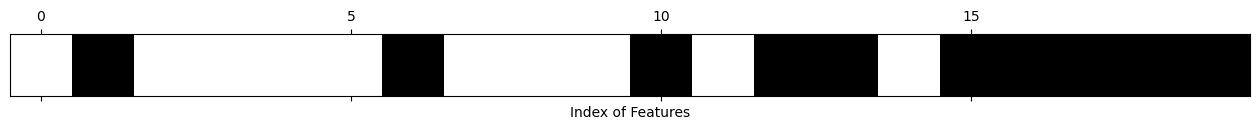

In [76]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rfc_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state= 28), threshold='median')
rfc_selector.fit(x_train_enc, y_train)

X_train_rfc_SelectFromModel = rfc_selector.transform(x_train_enc)
X_test_rfc_SelectFromModel = rfc_selector.transform(x_test_enc)

mask = rfc_selector.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Index of Features")
plt.yticks(())
plt.show()

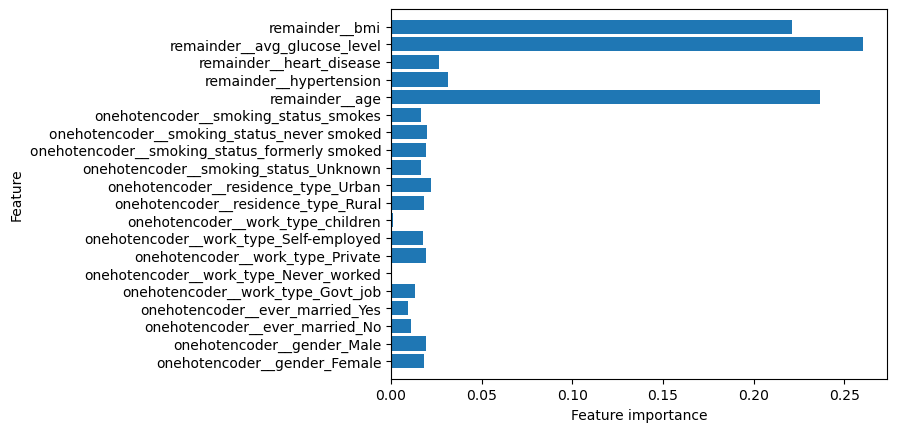

In [77]:
def plot_feature_importaces(classifier, dataset, feat_names):
    n_features = dataset.shape[1]
    plt.barh(range(n_features), classifier.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), feat_names)

    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()
plot_feature_importaces(rfc_selector.estimator_, x_train_enc, Transformer.get_feature_names_out())

#### SelectKBest sebelum Standard Scaler

In [78]:
from sklearn.feature_selection import SelectKBest

SelectKBest_ = SelectKBest(k=10)
SelectKBest_.fit(x_train_enc, y_train)

X_train_KBest_ = SelectKBest_.transform(x_train_enc)
X_test_KBest_ = SelectKBest_.transform(x_test_enc)
mask = SelectKBest_.get_support()

print("Shape of X_train: {}".format(x_train_enc.shape))
print("\nShape of X_train_KBest: {}".format(X_train_KBest_.shape))
print("\nShape of X_test: {}".format(x_test_enc.shape))
print("\nShape of X_test_KBest: {}".format(X_test_KBest_.shape))

print("\nFitur terpilih : " , df_train_enc.columns[mask].values)

Shape of X_train: (4088, 20)

Shape of X_train_KBest: (4088, 10)

Shape of X_test: (1022, 20)

Shape of X_test_KBest: (1022, 10)

Fitur terpilih :  ['onehotencoder__ever_married_No' 'onehotencoder__ever_married_Yes'
 'onehotencoder__work_type_Self-employed'
 'onehotencoder__work_type_children'
 'onehotencoder__smoking_status_Unknown'
 'onehotencoder__smoking_status_formerly smoked' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level']


#### RFE sebelum Standard Scaler


Shape of X_train: (4088, 20)

Shape of X_train_RFE: (4088, 10)

Shape of X_test: (1022, 20)

Shape of X_test_RFE: (1022, 10)

Score rfe train: 1.0

Score RFE: 0.9471624266144814
Fitur terpilih :  ['onehotencoder__gender_Male' 'onehotencoder__work_type_Private'
 'onehotencoder__residence_type_Urban'
 'onehotencoder__smoking_status_formerly smoked'
 'onehotencoder__smoking_status_never smoked' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level' 'remainder__bmi']


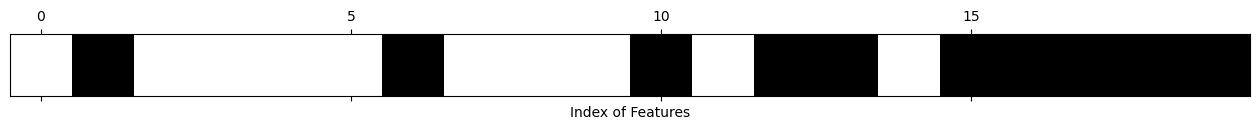

In [79]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfc = RFE(RandomForestClassifier(n_estimators=100, random_state= 28), n_features_to_select=10)
rfc.fit(x_train_enc, y_train)
X_train_RFE_ = rfc.transform(x_train_enc)
X_test_RFE_ = rfc.transform(x_test_enc)
mask = rfc.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Index of Features")
plt.yticks(())

print("Shape of X_train: {}".format(x_train_enc.shape))
print("\nShape of X_train_RFE: {}".format(X_train_RFE_.shape))
print("\nShape of X_test: {}".format(x_test_enc.shape))
print("\nShape of X_test_RFE: {}".format(X_test_RFE_.shape))

print("\nScore rfe train: {}".format(rfc.score(x_train_enc, y_train)))
print("\nScore RFE: {}".format(rfc.score(x_test_enc, y_test)))

print("Fitur terpilih : " , df_train_enc.columns[mask].values)

#### SelectKBest Setelah Standard Scaler

In [80]:
from sklearn.feature_selection import SelectKBest

SelectKBest = SelectKBest(k=10)
SelectKBest.fit(X_train_stscaled, y_train)

X_train_KBest = SelectKBest.transform(X_train_stscaled)
X_test_KBest = SelectKBest.transform(X_test_stscaled)

mask = SelectKBest.get_support()

print("Shape of X_train_stscaled: {}".format(X_train_stscaled.shape))
print("\nShape of X_train_KBest: {}".format(X_train_KBest.shape))
print("\nShape of X_test_stscaled: {}".format(X_test_stscaled.shape))
print("\nShape of X_test_KBest: {}".format(X_test_KBest.shape))
print("\nFitur terpilih : " , df_train_enc.columns[mask].values)

Shape of X_train_stscaled: (4088, 20)

Shape of X_train_KBest: (4088, 10)

Shape of X_test_stscaled: (1022, 20)

Shape of X_test_KBest: (1022, 10)

Fitur terpilih :  ['onehotencoder__ever_married_No' 'onehotencoder__ever_married_Yes'
 'onehotencoder__work_type_Self-employed'
 'onehotencoder__work_type_children'
 'onehotencoder__smoking_status_Unknown'
 'onehotencoder__smoking_status_formerly smoked' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level']


#### RFE Setelah Standard Scaler

Shape of X_train_stscaled: (4088, 20)

Shape of X_train_RFE: (4088, 10)

Shape of X_test_stscaled: (1022, 20)

Shape of X_test_RFE: (1022, 10)

Score RFE:  1.0

Score RFE:  0.9471624266144814
Feature yang terpilih :  ['onehotencoder__gender_Male' 'onehotencoder__work_type_Private'
 'onehotencoder__residence_type_Urban'
 'onehotencoder__smoking_status_formerly smoked'
 'onehotencoder__smoking_status_never smoked' 'remainder__age'
 'remainder__hypertension' 'remainder__heart_disease'
 'remainder__avg_glucose_level' 'remainder__bmi']


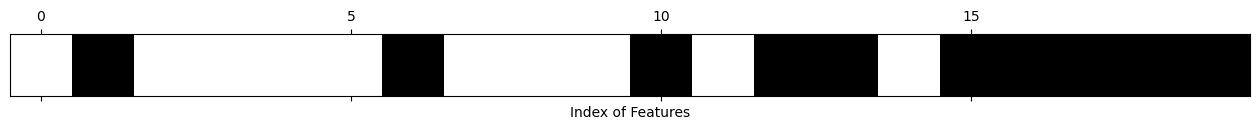

In [81]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selectRFE = RFE(RandomForestClassifier(n_estimators=100, random_state= 28 ), n_features_to_select=10)
selectRFE.fit(X_train_stscaled, y_train)

X_train_RFE = selectRFE.transform(X_train_stscaled)
X_test_RFE = selectRFE.transform(X_test_stscaled)

mask = selectRFE.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Index of Features")
plt.yticks(())

print("Shape of X_train_stscaled: {}".format(X_train_stscaled.shape))
print("\nShape of X_train_RFE: {}".format(X_train_RFE.shape))
print("\nShape of X_test_stscaled: {}".format(X_test_stscaled.shape))
print("\nShape of X_test_RFE: {}".format(X_test_RFE.shape))

print("\nScore RFE: ", selectRFE.score(X_train_stscaled, y_train))
print("\nScore RFE: ", selectRFE.score(X_test_stscaled, y_test))

print("Feature yang terpilih : ", df_train_enc.columns[mask].values)

### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>


##### Sub A1 Kombinasi StandardScaler+DecisionTree

Training set score: 1.000
Test set score: 0.910


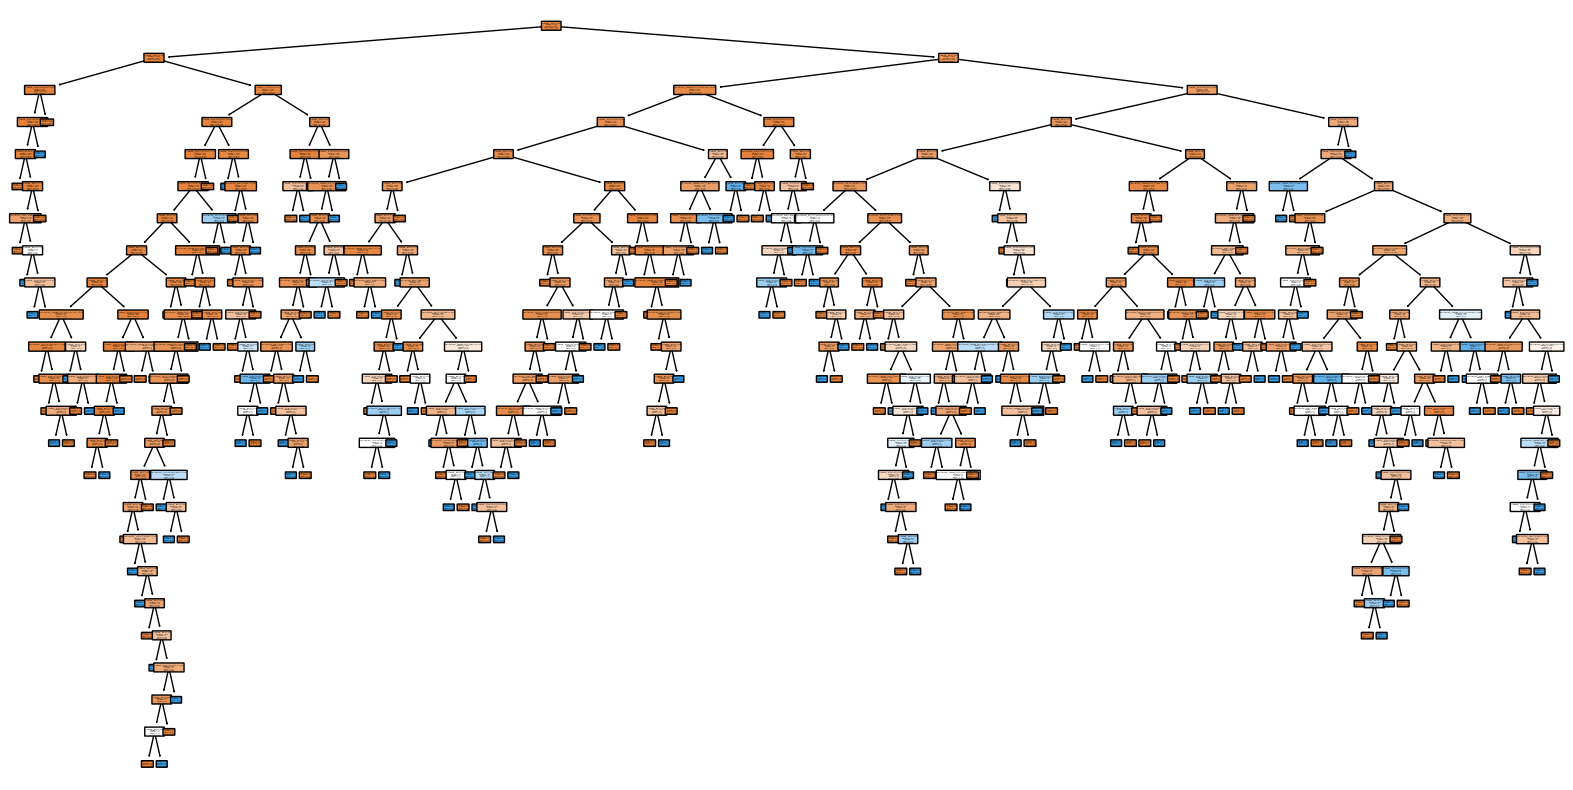

In [82]:
#cell code ini untuk proses pembuatan model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

DT_SD = DecisionTreeClassifier(random_state = 6, max_depth=25,criterion='entropy')
DT_SD.fit(X_train_stscaled, y_train)

print("Training set score: {:.3f}".format(DT_SD.score(X_train_stscaled, y_train)))
print("Test set score: {:.3f}".format(DT_SD.score(X_test_stscaled, y_test)))

plt.figure(figsize=(20,10))
dump = plot_tree(DT_SD , filled=True, rounded=True, class_names=["Healthy", "Stroke"], feature_names=df_train_enc.columns)

##### Sub A1 kombinasi StandardScaler+SelectKBest+DecisionTree

Training set score: 1.000
Test set score: 0.919


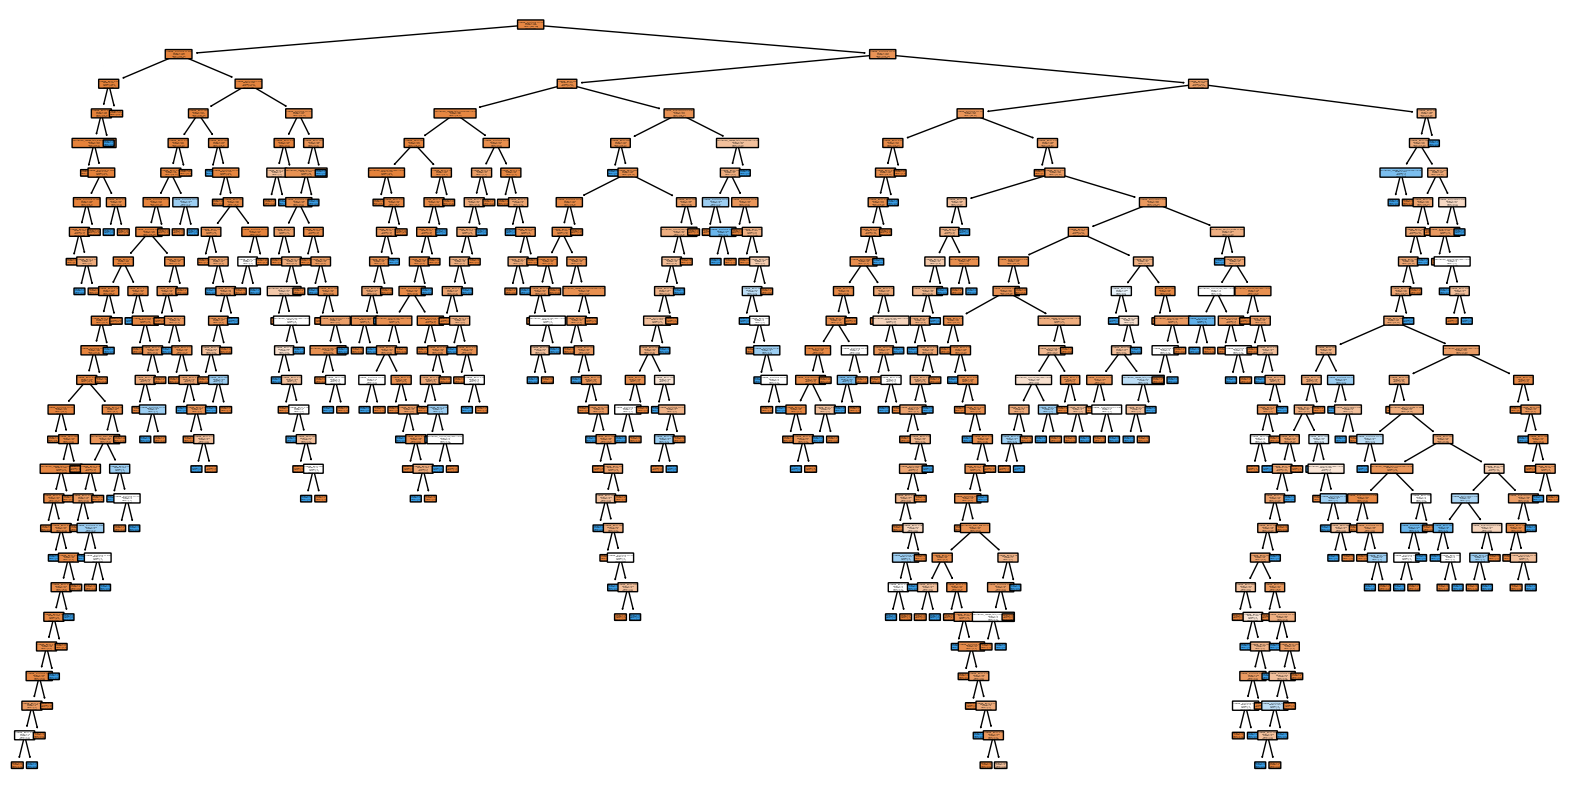

In [83]:
#cell code ini untuk proses pembuatan model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

DT_SSD = DecisionTreeClassifier(random_state = 6, max_depth=25,criterion='entropy')
DT_SSD.fit(X_train_KBest, y_train)

print("Training set score: {:.3f}".format(DT_SSD.score(X_train_KBest, y_train)))
print("Test set score: {:.3f}".format(DT_SSD.score(X_test_KBest, y_test)))

plt.figure(figsize=(20,10))

dump = plot_tree(DT_SSD, filled=True, rounded=True, class_names=["Healthy", "Stroke"], feature_names=df_train_enc.columns[mask].values)

##### Sub A2 kombinasi StandardScaler+LogisticRegression

In [84]:
#cell code ini untuk proses pembuatan model
from sklearn.linear_model import LogisticRegression

LR_SL = LogisticRegression(C = 0.2, max_iter=10000, class_weight='balanced')
LR_SL.fit(X_train_stscaled, y_train)

print("Training set score: {:.3f}".format(LR_SL.score(X_train_stscaled, y_train)))
print("Test set score: {:.3f}".format(LR_SL.score(X_test_stscaled, y_test)))

Training set score: 0.745
Test set score: 0.749


##### Sub A2 kombinasi StandardScaler+SelectKBest+LogisticRegression

In [85]:
#cell code ini untuk proses pembuatan model
from sklearn.linear_model import LogisticRegression

LR_SSL = LogisticRegression(C=0.1, max_iter=10000, class_weight='balanced')
LR_SSL.fit(X_train_KBest, y_train)

print("Training set score: {:.3f}".format(LR_SSL.score(X_train_KBest, y_train)))
print("Test set score: {:.3f}".format(LR_SSL.score(X_test_KBest, y_test)))

Training set score: 0.746
Test set score: 0.737


##### Sub A3 kombinasi StandardScaler+RFE+DecisionTree

Training set score: 1.000
Test set score: 0.902


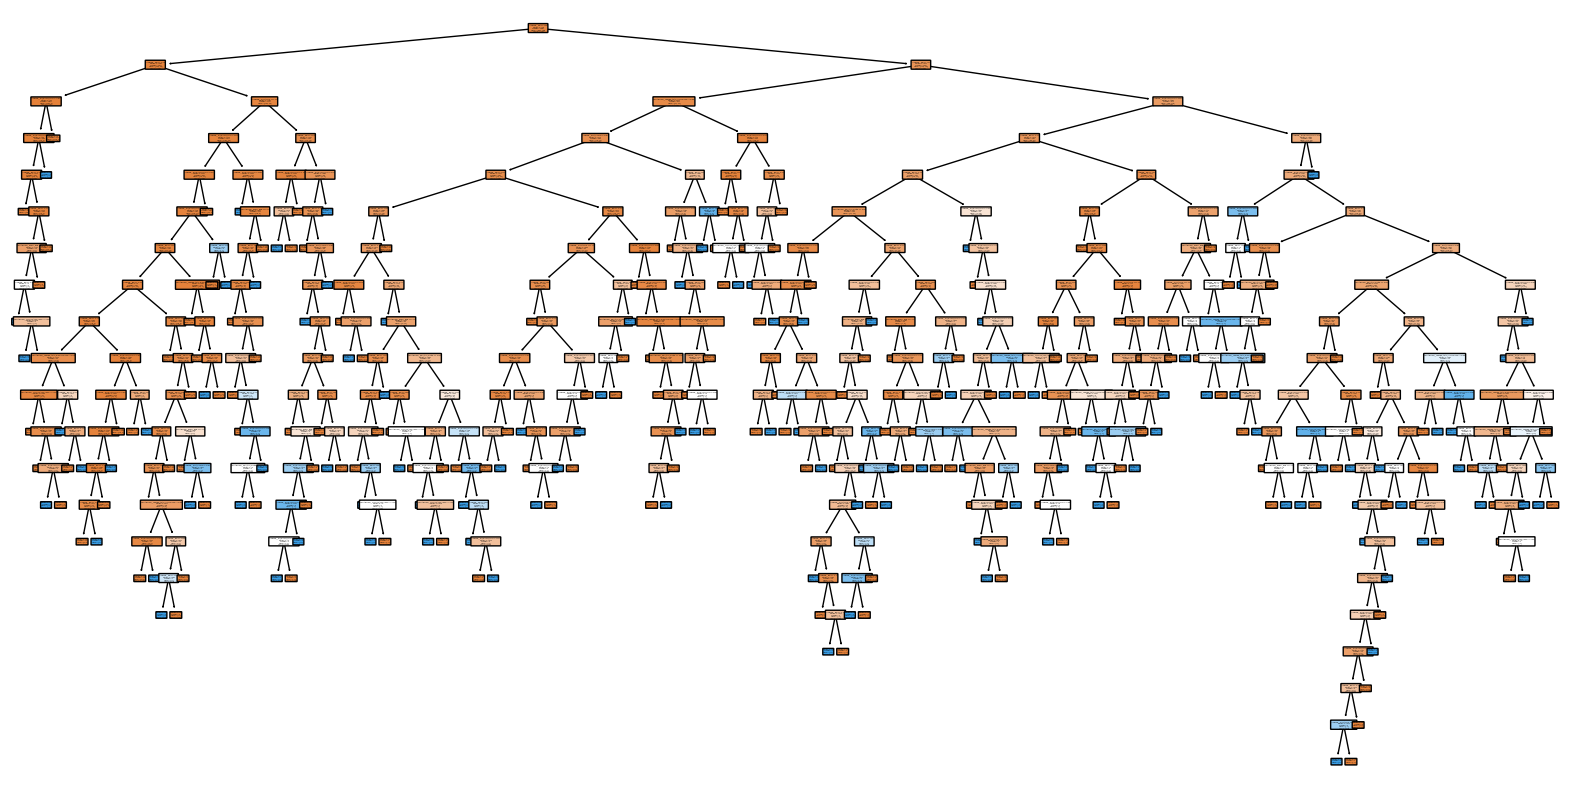

In [86]:
#cell code ini untuk proses pembuatan model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

DT_SRD = DecisionTreeClassifier(random_state = 6, max_depth=25,criterion='entropy')
DT_SRD.fit(X_train_RFE, y_train)

print("Training set score: {:.3f}".format(DT_SRD.score(X_train_RFE, y_train)))
print("Test set score: {:.3f}".format(DT_SRD.score(X_test_RFE, y_test)))

plt.figure(figsize=(20,10))
dump = plot_tree(DT_SRD, filled=True, rounded=True, class_names=["Healthy", "Stroke"], feature_names=df_train_enc.columns[mask].values)

##### Sub A3 kombinasi StandardScaler+RFE+LogisticRegression

In [87]:
#cell code ini untuk proses pembuatan model
from sklearn.linear_model import LogisticRegression

LR_SRL = LogisticRegression(C=0.1, max_iter=10000, class_weight='balanced')
LR_SRL.fit(X_train_RFE, y_train)

print("Training set score: {:.3f}".format(LR_SRL.score(X_train_RFE, y_train)))
print("Test set score: {:.3f}".format(LR_SRL.score(X_test_RFE, y_test)))

Training set score: 0.742
Test set score: 0.742


### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [88]:
#lakukan proses evaluasi model algoritme pembelajaran mesin

print("\nTraining Sub A1 kombinasi StandardScaler+DecisionTree")
print("Training set score: {:.3f}".format(DT_SD.score(X_train_stscaled, y_train)))
print("Test set score: {:.3f}".format(DT_SD.score(X_test_stscaled, y_test)))

print("\nTraining Sub A1 kombinasi StandardScaler+SelectKBest+DecisionTree")
print("Training set score: {:.3f}".format(DT_SSD.score(X_train_KBest, y_train)))
print("Test set score: {:.3f}".format(DT_SSD.score(X_test_KBest, y_test)))

print("\nTraining Sub A2 kombinasi StandardScaler+LogisticRegression")
print("Training set score: {:.3f}".format(LR_SL.score(X_train_stscaled, y_train)))
print("Test set score: {:.3f}".format(LR_SL.score(X_test_stscaled, y_test)))

print("\nTraining Sub A2 kombinasi StandardScaler+SelectKBest+LogisticRegression")
print("Training set score: {:.3f}".format(LR_SSL.score(X_train_KBest, y_train)))
print("Test set score: {:.3f}".format(LR_SSL.score(X_test_KBest, y_test)))

print("\nTraining Sub A3 kombinasi StandardScaler+RFE+DecisionTree")
print("Training set score: {:.3f}".format(DT_SRD.score(X_train_RFE, y_train)))
print("Test set score: {:.3f}".format(DT_SRD.score(X_test_RFE, y_test)))

print("\nTraining Sub A3 kombinasi StandardScaler+RFE+LogisticRegression")
print("Training set score: {:.3f}".format(LR_SRL.score(X_train_RFE, y_train)))
print("Test set score: {:.3f}".format(LR_SRL.score(X_test_RFE, y_test)))


Training Sub A1 kombinasi StandardScaler+DecisionTree
Training set score: 1.000
Test set score: 0.910

Training Sub A1 kombinasi StandardScaler+SelectKBest+DecisionTree
Training set score: 1.000
Test set score: 0.919

Training Sub A2 kombinasi StandardScaler+LogisticRegression
Training set score: 0.745
Test set score: 0.749

Training Sub A2 kombinasi StandardScaler+SelectKBest+LogisticRegression
Training set score: 0.746
Test set score: 0.737

Training Sub A3 kombinasi StandardScaler+RFE+DecisionTree
Training set score: 1.000
Test set score: 0.902

Training Sub A3 kombinasi StandardScaler+RFE+LogisticRegression
Training set score: 0.742
Test set score: 0.742


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning? 

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat? 

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*tulis jawaban Anda di cell ini*

1. Ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning. Hal ini terlihat dari hasil evaluasi model yang dilakukan. Pada model yang menggunakan StandardScaler, akurasi pada train set dan test set hampir sama. Sedangkan pada model yang tidak menggunakan StandardScaler, akurasi pada train set lebih tinggi dibandingkan akurasi pada test set. Hal ini menunjukkan bahwa model yang menggunakan StandardScaler memiliki performa yang lebih baik dibandingkan model yang tidak menggunakan StandardScaler.

2. Feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat adalah Age , Avg_glucose_level , BMI

3. Model terbaik adalah = Sub A1 kombinasi StandardScaler + SelectKbest + DecisionTree dengan akurasi train 1 dan akurasi test 0.919 dengan parameter random_state = 6, max_depth=25,criterion='entropy')
